In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# These variables will be computed later part of plotting
# I need temperature, max temperature, cloudiness, windspeed, name of city, latitude, longitude
# these will be append as we go through each API. 
temp = []
humidity = []
cloudiness = []
windspeed = []
name = []
lat = []
lng = []
max_temp = []
country = []

# Save config information
baseURL = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Build query URL
for city in cities:
    try:
        queryURL = f"{baseURL}appid={weather_api_key}&units={units}&q={city}"
        # Get weather data
        # And put each neceesary information and append to variable that is needed defined above
        weatherResponse = requests.get(queryURL)
        weatherJSON = weatherResponse.json()
        temp.append(weatherJSON['main']['temp'])
        max_temp.append(weatherJSON['main']['temp_max'])
        humidity.append(weatherJSON['main']['humidity'])
        cloudiness.append(weatherJSON['clouds']['all'])
        windspeed.append(weatherJSON['wind']['speed'])
        lat.append(weatherJSON['coord']['lat'])
        lng.append(weatherJSON['coord']['lon'])
        name.append(weatherJSON['name'])
        country.append(weatherJSON["sys"]["country"])
        numberid = weatherJSON['id']
        print(f"City id number is {numberid} and city name is {city}")   
    except KeyError:
        # if API of the city does not have any information it will skip and print out message. 
        print(f"{city} does not have data in api")
     

City id number is 3874787 and city name is punta arenas
City id number is 2126199 and city name is cherskiy
City id number is 6165406 and city name is thompson
City id number is 2110227 and city name is butaritari
City id number is 3175096 and city name is lasa
City id number is 3443061 and city name is chuy
City id number is 3466704 and city name is castro
City id number is 962367 and city name is richards bay
City id number is 5880054 and city name is barrow
City id number is 6201424 and city name is mataura
City id number is 5044290 and city name is saint anthony
City id number is 2022572 and city name is khatanga
City id number is 2023584 and city name is imeni poliny osipenko
City id number is 3698359 and city name is chicama
City id number is 1015776 and city name is bredasdorp
City id number is 3369157 and city name is cape town
bolungarvik does not have data in api
City id number is 103630 and city name is najran
City id number is 546105 and city name is nikolskoye
City id numb

City id number is 3137469 and city name is sorland
City id number is 5861897 and city name is fairbanks
City id number is 1715015 and city name is dicabisagan
wahran does not have data in api
City id number is 1626542 and city name is sorong
City id number is 2986626 and city name is plouzane
City id number is 1737185 and city name is kapit
City id number is 5563839 and city name is fortuna
City id number is 2222230 and city name is sangmelima
City id number is 4031574 and city name is provideniya
City id number is 897456 and city name is sinazongwe
City id number is 1490085 and city name is tarko-sale
City id number is 368246 and city name is raga
City id number is 2501152 and city name is constantine
City id number is 2112444 and city name is kamaishi
City id number is 3466980 and city name is caravelas
City id number is 3511626 and city name is bayaguana
City id number is 501847 and city name is rochegda
City id number is 3837213 and city name is san juan
City id number is 1067565 a

City id number is 986717 and city name is kruisfontein
City id number is 3412093 and city name is vestmannaeyjar
City id number is 563708 and city name is dzerzhinsk
City id number is 1794903 and city name is shiyan
yunjinghong does not have data in api
City id number is 4590184 and city name is orangeburg
City id number is 2084442 and city name is vanimo
palabuhanratu does not have data in api
City id number is 6450593 and city name is bischheim
City id number is 1861280 and city name is itoman
City id number is 5418104 and city name is cortez
City id number is 1283161 and city name is lahan
City id number is 1803365 and city name is linqiong
City id number is 1517060 and city name is zaysan
City id number is 1510916 and city name is barabinsk
City id number is 2030065 and city name is mandalgovi
City id number is 1511057 and city name is bakchar
City id number is 5503914 and city name is fallon
City id number is 2122605 and city name is okhotsk
City id number is 2013279 and city name

City id number is 2630299 and city name is hofn
City id number is 3837056 and city name is san luis
City id number is 1808722 and city name is hefei
City id number is 6111862 and city name is port hardy
City id number is 6620339 and city name is karratha
City id number is 6182001 and city name is wilkie
City id number is 3347353 and city name is menongue
City id number is 1529660 and city name is aksu
City id number is 570086 and city name is chagoda
City id number is 1045114 and city name is inhambane
City id number is 3939168 and city name is huarmey
City id number is 3664716 and city name is canutama
marcona does not have data in api
City id number is 2636790 and city name is stornoway
City id number is 1651531 and city name is ambon
City id number is 1528998 and city name is yumen
City id number is 2315417 and city name is inongo
City id number is 3489440 and city name is morant bay
City id number is 2338660 and city name is yaan
City id number is 2447513 and city name is arlit
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# ALL information extracted before will now be added as DataFrame. 
weather_dict = {
    "City": name,
    "Country" : country,
    "Temperature (C)": temp,
    "Max Temperature (C)" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Windspeed (mph)" : windspeed,
    "Latitude" : lat,
    "Longitude" : lng
}
weatherDF = pd.DataFrame(weather_dict)
weatherDF.head()

,City,Country,Temperature (C),Max Temperature (C),Humidity,Cloudiness,Windspeed (mph),Latitude,Longitude
0,Punta Arenas,CL,2.96,3.06,65,20,8.23,-53.1500,-70.9167
1,Cherskiy,RU,5.63,5.63,68,4,4.34,68.7500,161.3000
2,Thompson,CA,18.09,18.09,72,75,1.03,55.7435,-97.8558
3,Butaritari,KI,27.53,27.53,75,12,7.99,3.0707,172.7902
4,Laas,IT,22.23,23.49,89,55,2.28,46.6166,10.7002


In [5]:
# This DataFrame will now saved to .CSV format. 
weatherDF.to_csv("../output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# length of cities in original DataFrame. This will be amount of city inside original Dataframe
len(weatherDF['Humidity'])

561

In [7]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weatherDF.loc[weatherDF['Humidity'] <= 100]
len(clean_city_data['Humidity'])

561

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

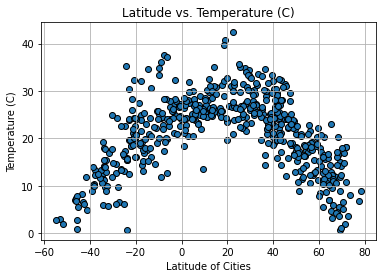

In [8]:
# From previous dataframe "cleaned_city_data", Latitude and Temperature column values will be saved
# Latitude and Temperature will become x value and y value

latitude = clean_city_data['Latitude']
temperature = clean_city_data['Temperature (C)']

# Plot scatterplot with x value and y value above, with edgecolor
plt.scatter(latitude, temperature, marker = "o", edgecolors="black")
plt.xlabel('Latitude of Cities')
plt.ylabel('Temperature (C)')

# Title this plot and put grid lines
plt.title("Latitude vs. Temperature (C)")
plt.grid()

# Save this figure before showing it below 
plt.savefig("../output_data/Fig1.png")
plt.show()

#### This figure shows temperature is generally higher in latitude closer to 0. 

## Latitude vs. Humidity Plot

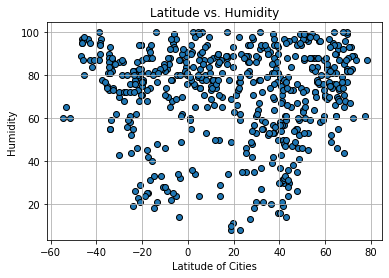

In [9]:
# From previous dataframe "cleaned_city_data", Latitude and Humidity column values will be saved
# Latitude and Humidity will become x value and y value
humidity = clean_city_data['Humidity']

# Plot scatterplot with x value and y value above, with edgecolor
plt.scatter(latitude, humidity, marker = "o", edgecolors="black")
plt.xlabel('Latitude of Cities')
plt.ylabel('Humidity')

# Title this plot and put grid lines
plt.title("Latitude vs. Humidity")
plt.grid()

# Save this figure before showing it below 
plt.savefig("../output_data/Fig2.png")
plt.show()

#### This figure shows humidity (%) on each city, and latitude of each city. There is no apparent relationship from this scatterplot, but it shows there are more cities with lower humity closer to latitude 0. 

## Latitude vs. Cloudiness Plot

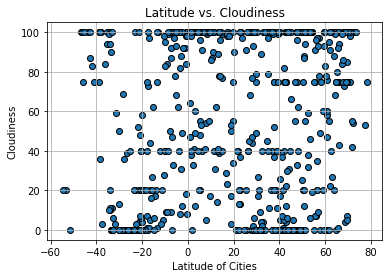

In [10]:
# From previous dataframe "cleaned_city_data", Latitude and Cloudiness column values will be saved
# Latitude and Cloudiness will become x value and y value

cloudiness = clean_city_data['Cloudiness']

# Plot scatterplot with x value and y value above, with edgecolor
plt.scatter(latitude, cloudiness, marker = "o", edgecolors="black")
plt.xlabel('Latitude of Cities')
plt.ylabel('Cloudiness')

# Title this plot and put grid lines
plt.title("Latitude vs. Cloudiness")
plt.grid()

# Save this figure before showing it below 
plt.savefig("../output_data/Fig3.png")
plt.show()

#### This figure shows each cities latitude and cloudiness. There are no apparent relationship. 

## Latitude vs. Wind speed (mph) Plot

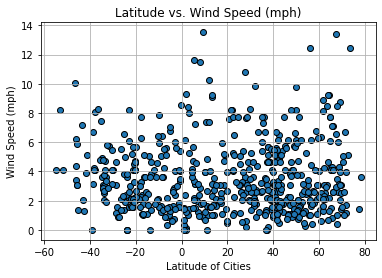

In [11]:
# From previous dataframe "cleaned_city_data", Latitude and Wind speed column values will be saved
# Latitude and Wind speed will become x value and y value

windspeed = clean_city_data['Windspeed (mph)']

# Plot scatterplot with x value and y value above, with edgecolor
plt.scatter(latitude, windspeed, marker = "o", edgecolors="black")
plt.xlabel('Latitude of Cities')
plt.ylabel('Wind Speed (mph)')

# Title this plot and put grid lines
plt.title("Latitude vs. Wind Speed (mph)")
plt.grid()

# Save this figure before showing it below 
plt.savefig("../output_data/Fig4.png")
plt.show()

#### This figure shows each cities latitude and wind speed(mph). It shows there are rarely any cities that has more than 10mph wind speed. Generally, all cities have 0~6 mph wind speed regardless of latitude. 

## Linear Regression

In [12]:
# Before starting, from previous clean_city_data that has no humidity more than 100, 
# following will divide northern hemisphere data and southern hemisphere data 

northern_hemi = clean_city_data.loc[clean_city_data["Latitude"] > 0, :]
southern_hemi = clean_city_data.loc[clean_city_data["Latitude"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.45708669463502766


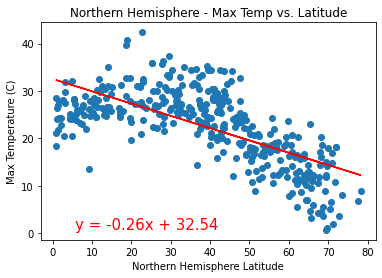

In [13]:
# From northern hemisphere data, 'Max Temperature' will be extracted for y value
# From northern hemistphere data, 'Latitude' will be extraced for x value
North_Max_Temp = northern_hemi['Max Temperature (C)']
North_Latitude = northern_hemi['Latitude']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(North_Latitude, North_Max_Temp, marker = "o")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

# Next, regression line will be computed between designated x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Latitude, North_Max_Temp)
regress_values = North_Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line in appropriate location, with red solid line 
plt.plot(North_Latitude,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")

plt.savefig("../output_data/Fig5.png")
plt.show()


#### There is moderate negative relationship between max temperature and latitude of cities in northern hemisphere. In short, higher the latitude of city, max temperature of that city will be lower. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5747946916187934


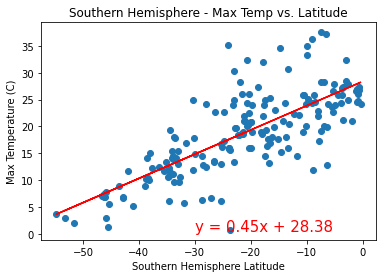

In [14]:
# From southern hemisphere data, 'Max Temperature' will be extracted for y value
# From southern hemistphere data, 'Latitude' will be extraced for x value
South_Max_Temp = southern_hemi['Max Temperature (C)']
South_Latitude = southern_hemi['Latitude']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(South_Latitude, South_Max_Temp, marker = "o")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

# Next, regression line will be computed between designated x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Latitude, South_Max_Temp)
regress_values = South_Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line in appropriate location, with red solid line 
plt.plot(South_Latitude,regress_values,"r-")
plt.annotate(line_eq,(-30,0.5),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig6.png")
plt.show()

#### There is moderate to strong positive relationship between max temperature and latitude of cities in southern hemisphere. In short, higher the latitude of city, max temperature of that city will be higher. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.004995201695033821


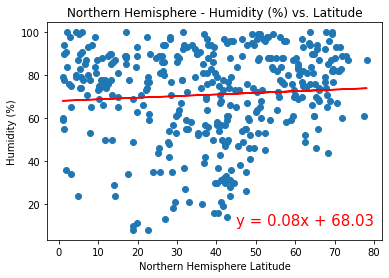

In [15]:
# From northern hemisphere data, 'Humiditiy' will be extracted for y value
# From northern hemistphere data, 'Latitude' will be extraced for x value
North_Humidity = northern_hemi['Humidity']
North_Latitude = northern_hemi['Latitude']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(North_Latitude, North_Humidity, marker = "o")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")

# Next, regression line will be computed between designated x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Latitude, North_Humidity)
regress_values = North_Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line in appropriate location, with red solid line 
plt.plot(North_Latitude,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig7.png")
plt.show()


#### There is very weak positive relationship between humidity and latitude of cities in northern hemisphere. In short, there are no substantial relationship between humidity (%) and latitude of cities in northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04134492524513469


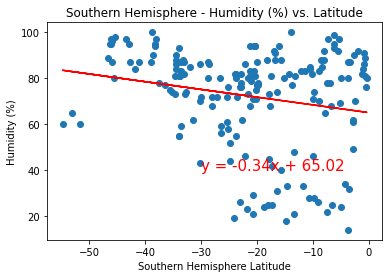

In [16]:
# From southern hemisphere data, 'Humiditiy' will be extracted for y value
# From southern hemistphere data, 'Latitude' will be extraced for x value
South_Humidity = southern_hemi['Humidity']
South_Latitude = southern_hemi['Latitude']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(South_Latitude, South_Humidity, marker = "o")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")

# Next, regression line will be computed between designated x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Latitude, South_Humidity)
regress_values = South_Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line in appropriate location, with red solid line 
plt.plot(South_Latitude,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig8.png")
plt.show()

#### There is a weak negative relationship between humidity and latitude of cities in southern hemisphere.  From this scatterplot and regression line, higher latitude is, each city tends to have lower humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0006828380115466459


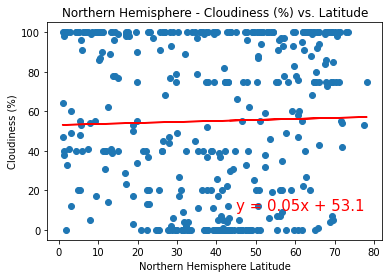

In [17]:
# From northern hemisphere data, 'Cloudiness' will be extracted for y value
# From northern hemistphere data, 'Latitude' will be extraced for x value
North_Cloud = northern_hemi['Cloudiness']
North_Latitude = northern_hemi['Latitude']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(North_Latitude, North_Cloud, marker = "o")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")

# Next, regression line will be computed between designated x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Latitude, North_Cloud)
regress_values = North_Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(North_Latitude,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig9.png")
plt.show()


#### There is a very weak relationship between cloudiness and latitude of cities in northern hemisphere.  From this scatterplot and regression line, it is hard to define if there is any relationship that can predict these two variable. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00035152122141532535


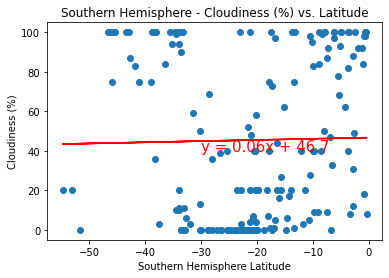

In [18]:
# From southern hemisphere data, 'Cloudiness' will be extracted for y value
# From southern hemistphere data, 'Latitude' will be extraced for x value
South_Cloud = southern_hemi['Cloudiness']
South_Latitude = southern_hemi['Latitude']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(South_Latitude, South_Cloud, marker = "o")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")

# Next, regression line will be computed between designated x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Latitude, South_Cloud)
regress_values = South_Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line in appropriate location, with red solid line 
plt.plot(South_Latitude,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig10.png")
plt.show()

#### There is a very weak relationship between cloudiness and latitude of cities in southern hemisphere.  From this scatterplot and regression line, it is hard to define if there is any relationship that can predict these two variable. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0012583615285297377


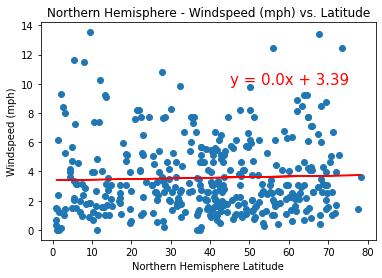

In [19]:
# From northern hemisphere data, 'Wind Speed (mph)' will be extracted for y value
# From northern hemistphere data, 'Latitude' will be extraced for x value
North_Wind = northern_hemi['Windspeed (mph)']
North_Latitude = northern_hemi['Latitude']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(North_Latitude, North_Wind, marker = "o")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Windspeed (mph)')
plt.title("Northern Hemisphere - Windspeed (mph) vs. Latitude")

# Next, regression line will be computed between designated x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(North_Latitude, North_Wind)
regress_values = North_Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line in appropriate location, with red solid line 
plt.plot(North_Latitude,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig11.png")
plt.show()


#### There is a very weak relationship between wind speed (mph) and latitude of cities in northern hemisphere.  From this scatterplot and regression line, it seems most of cities have windspeed (mph) between 0 ~ 6 mph regardless of latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03559924130193949


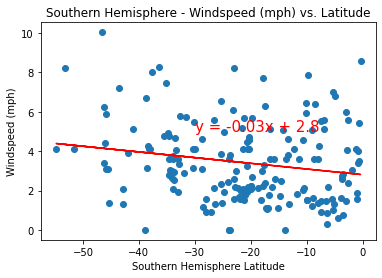

In [20]:
# From southern hemisphere data, 'Wind Speed (mph)' will be extracted for y value
# From southern hemistphere data, 'Latitude' will be extraced for x value
South_Wind = southern_hemi['Windspeed (mph)']
South_Latitude = southern_hemi['Latitude']

# Plot scatterplot with x value and y value above, with edgecolor with labels and titles
plt.scatter(South_Latitude, South_Wind, marker = "o")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Windspeed (mph)')
plt.title("Southern Hemisphere - Windspeed (mph) vs. Latitude")

# Next, regression line will be computed between designated x and y values
(slope, intercept, rvalue, pvalue, stderr) = linregress(South_Latitude, South_Wind)
regress_values = South_Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot regression line in appropriate location, with red solid line 
plt.plot(South_Latitude,regress_values,"r-")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# print r value and show scatterplot with regression line
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig12.png")
plt.show()

#### There is a very weak relationship between wind speed (mph) and latitude of cities in southern hemisphere.  From this scatterplot and regression line, it seems most of cities have windspeed (mph) between 0 ~ 6 mph regardless of latitude. 